# Practice case using Cars Dataset

## 1. Import libraries

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Import Data

In [2]:
data=pd.read_csv('craigslistVehiclesFull.csv', encoding='Latin1')
data.head()

,url,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,...,paint_color,image_url,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
0,https://marshall.craigslist.org/cto/d/2010-dod...,marshall,11900,2010.0,dodge,challenger se,good,6 cylinders,gas,43600.0,...,red,https://images.craigslist.org/00i0i_2ggH1eKDNK...,43.4775,-96.7041,46083.0,Lincoln,46.0,SD,South Dakota,38.0
1,https://marshall.craigslist.org/cto/d/fleetwoo...,marshall,1515,1999.0,NaN,fleetwood,NaN,NaN,gas,NaN,...,NaN,https://images.craigslist.org/00M0M_irjh7SjEcU...,44.7612,-96.6907,46039.0,Deuel,46.0,SD,South Dakota,38.0
2,https://marshall.craigslist.org/cto/d/2008-for...,marshall,17550,2008.0,ford,f-150,NaN,NaN,gas,NaN,...,NaN,https://images.craigslist.org/00s0s_eL2XFhEUcx...,44.1415,-103.2052,46093.0,Meade,46.0,SD,South Dakota,38.0
3,https://marshall.craigslist.org/cto/d/ford-tau...,marshall,2800,2004.0,ford,taurus,good,6 cylinders,gas,168591.0,...,grey,https://images.craigslist.org/00L0L_5HUR1nQjt8...,43.2845,-95.5930,19143.0,Osceola,19.0,IA,Iowa,47.0
4,https://marshall.craigslist.org/cto/d/2001-gra...,marshall,400,2001.0,NaN,2001 Grand Prix,NaN,NaN,gas,217000.0,...,NaN,https://images.craigslist.org/00n0n_bJJ1XnonSG...,43.0261,-94.4064,19109.0,Kossuth,19.0,IA,Iowa,47.0


## 3. Explanatory Data

In [3]:
#In this part, i am dropping variables 'url' and 'image_url' cause this variables just contain information about link url
#And i dont need those variab

data=data.drop(['url','image_url'], axis=1)
data.head()

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,...,type,paint_color,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
0,marshall,11900,2010.0,dodge,challenger se,good,6 cylinders,gas,43600.0,clean,...,coupe,red,43.4775,-96.7041,46083.0,Lincoln,46.0,SD,South Dakota,38.0
1,marshall,1515,1999.0,NaN,fleetwood,NaN,NaN,gas,NaN,clean,...,NaN,NaN,44.7612,-96.6907,46039.0,Deuel,46.0,SD,South Dakota,38.0
2,marshall,17550,2008.0,ford,f-150,NaN,NaN,gas,NaN,clean,...,NaN,NaN,44.1415,-103.2052,46093.0,Meade,46.0,SD,South Dakota,38.0
3,marshall,2800,2004.0,ford,taurus,good,6 cylinders,gas,168591.0,clean,...,sedan,grey,43.2845,-95.5930,19143.0,Osceola,19.0,IA,Iowa,47.0
4,marshall,400,2001.0,NaN,2001 Grand Prix,NaN,NaN,gas,217000.0,clean,...,NaN,NaN,43.0261,-94.4064,19109.0,Kossuth,19.0,IA,Iowa,47.0


In [4]:
#get information about number of column and number of rows of data
data.shape

(1723065, 24)

In [5]:
#get information about type of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723065 entries, 0 to 1723064
Data columns (total 24 columns):
city            object
price           int64
year            float64
manufacturer    object
make            object
condition       object
cylinders       object
fuel            object
odometer        float64
title_status    object
transmission    object
vin             object
drive           object
size            object
type            object
paint_color     object
lat             float64
long            float64
county_fips     float64
county_name     object
state_fips      float64
state_code      object
state_name      object
weather         float64
dtypes: float64(7), int64(1), object(16)
memory usage: 315.5+ MB


In [6]:
#detection missing values each variables of data
count_missing = data.isnull().sum().sort_values(ascending = False)
count_missing

size            1123967
vin             1118215
type             702931
condition        700790
paint_color      695650
cylinders        691291
drive            661884
odometer         564054
manufacturer     136414
make              69699
weather           59428
county_fips       58833
county_name       58833
state_fips        58833
state_code        58833
fuel              10367
transmission       9022
year               6315
title_status       2554
lat                   0
state_name            0
long                  0
price                 0
city                  0
dtype: int64

In [7]:
#count percentage of missing values each variables of data
percentage = round(data.isnull().sum()/len(data)*100,2).sort_values(ascending = False)
percentage

size            65.23
vin             64.90
type            40.80
condition       40.67
paint_color     40.37
cylinders       40.12
drive           38.41
odometer        32.74
manufacturer     7.92
make             4.05
weather          3.45
county_fips      3.41
county_name      3.41
state_fips       3.41
state_code       3.41
fuel             0.60
transmission     0.52
year             0.37
title_status     0.15
lat              0.00
state_name       0.00
long             0.00
price            0.00
city             0.00
dtype: float64

In [8]:
#cause from percentage of missing values in each variable, size and vins has > 60% missing value in thir dataset
#so, in this part. I handle this problem to deleting column of size and vins. And from the information dataset, size is size of vehicles
# and vins is Vehicle Identification Number. so, i think this variable is not important to analysis

data=data.drop(['size','vin'], axis=1)
data.head()

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,...,type,paint_color,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
0,marshall,11900,2010.0,dodge,challenger se,good,6 cylinders,gas,43600.0,clean,...,coupe,red,43.4775,-96.7041,46083.0,Lincoln,46.0,SD,South Dakota,38.0
1,marshall,1515,1999.0,NaN,fleetwood,NaN,NaN,gas,NaN,clean,...,NaN,NaN,44.7612,-96.6907,46039.0,Deuel,46.0,SD,South Dakota,38.0
2,marshall,17550,2008.0,ford,f-150,NaN,NaN,gas,NaN,clean,...,NaN,NaN,44.1415,-103.2052,46093.0,Meade,46.0,SD,South Dakota,38.0
3,marshall,2800,2004.0,ford,taurus,good,6 cylinders,gas,168591.0,clean,...,sedan,grey,43.2845,-95.5930,19143.0,Osceola,19.0,IA,Iowa,47.0
4,marshall,400,2001.0,NaN,2001 Grand Prix,NaN,NaN,gas,217000.0,clean,...,NaN,NaN,43.0261,-94.4064,19109.0,Kossuth,19.0,IA,Iowa,47.0


## 3.1 Handle Missing Value

### In this part, i am handling missing values using mode of data for categorical data and median of data for numerical data.

In [9]:
##I using median cause median is robust for outlier.

In [10]:
data['type'] = data['type'].fillna(data['type'].mode().values[0])

In [11]:
data['condition'] = data['condition'].fillna(data['condition'].mode().values[0])

In [12]:
data['paint_color'] = data['paint_color'].fillna(data['paint_color'].mode().values[0])

In [13]:
data['cylinders'] = data['cylinders'].fillna(data['cylinders'].mode().values[0])

In [14]:
data['drive'] = data['drive'].fillna(data['drive'].mode().values[0])

In [15]:
data['manufacturer'] = data['manufacturer'].fillna(data['manufacturer'].mode().values[0])

In [16]:
data['make'] = data['make'].fillna(data['make'].mode().values[0])

In [17]:
data['county_name'] = data['county_name'].fillna(data['county_name'].mode().values[0])

In [18]:
data['state_code'] = data['state_code'].fillna(data['state_code'].mode().values[0])

In [19]:
data['fuel'] = data['fuel'].fillna(data['fuel'].mode().values[0])

In [20]:
data['transmission'] = data['transmission'].fillna(data['transmission'].mode().values[0])

In [21]:
data['title_status'] = data['title_status'].fillna(data['title_status'].mode().values[0])

In [22]:
data['year'] = data['year'].fillna(data['year'].mode().values[0])

In [23]:
data['weather'] = data['weather'].fillna(data['weather'].mode().values[0])

In [24]:
median_value1=data['odometer'].median()
median_value3=data['state_fips'].median()
median_value4=data['county_fips'].median()
data['odometer']=data['odometer'].fillna(median_value1)
data['state_fips']=data['state_fips'].fillna(median_value3)
data['county_fips']=data['county_fips'].fillna(median_value4)
data.head()


,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,...,type,paint_color,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
0,marshall,11900,2010.0,dodge,challenger se,good,6 cylinders,gas,43600.0,clean,...,coupe,red,43.4775,-96.7041,46083.0,Lincoln,46.0,SD,South Dakota,38.0
1,marshall,1515,1999.0,ford,fleetwood,excellent,6 cylinders,gas,107000.0,clean,...,sedan,white,44.7612,-96.6907,46039.0,Deuel,46.0,SD,South Dakota,38.0
2,marshall,17550,2008.0,ford,f-150,excellent,6 cylinders,gas,107000.0,clean,...,sedan,white,44.1415,-103.2052,46093.0,Meade,46.0,SD,South Dakota,38.0
3,marshall,2800,2004.0,ford,taurus,good,6 cylinders,gas,168591.0,clean,...,sedan,grey,43.2845,-95.5930,19143.0,Osceola,19.0,IA,Iowa,47.0
4,marshall,400,2001.0,ford,2001 Grand Prix,excellent,6 cylinders,gas,217000.0,clean,...,sedan,white,43.0261,-94.4064,19109.0,Kossuth,19.0,IA,Iowa,47.0


In [25]:
count_missing = data.isnull().sum().sort_values(ascending = False)
count_missing

weather         0
state_name      0
price           0
year            0
manufacturer    0
make            0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
lat             0
long            0
county_fips     0
county_name     0
state_fips      0
state_code      0
city            0
dtype: int64

### Formatting

In [127]:
#Conver numerical data to categorical data

data['year']=data['year'].astype(float).astype(object)
data['weather']=data['weather'].astype(float).astype(object)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723065 entries, 0 to 1723064
Data columns (total 22 columns):
city            object
price           int64
year            object
manufacturer    object
make            object
condition       object
cylinders       object
fuel            object
odometer        float64
title_status    object
transmission    object
drive           object
type            object
paint_color     object
lat             float64
long            float64
county_fips     float64
county_name     object
state_fips      float64
state_code      object
state_name      object
weather         object
dtypes: float64(5), int64(1), object(16)
memory usage: 289.2+ MB


## 3.2 EDA Plotting

In [ ]:
#create numerical variabel to create dataframe that contain numerical type of data

numerical= ['price', 'odometer', 'lat', 'long', 'county_fips', 'state_fips']

In [27]:
#create numerical and categorical dataframe to simply making plot

numerik = ['price', 'odometer', 'lat', 'long', 'county_fips', 'state_fips']
categorical=data.drop(numerik,axis=1)
numerical=data[numerik]
numerical.head()

,price,odometer,lat,long,county_fips,state_fips
0,11900,43600.0,43.4775,-96.7041,46083.0,46.0
1,1515,107000.0,44.7612,-96.6907,46039.0,46.0
2,17550,107000.0,44.1415,-103.2052,46093.0,46.0
3,2800,168591.0,43.2845,-95.5930,19143.0,19.0
4,400,217000.0,43.0261,-94.4064,19109.0,19.0


In [28]:
numerical.describe()

,price,odometer,lat,long,county_fips,state_fips
count,1.723065e+06,1.723065e+06,1.723065e+06,1.723065e+06,1.723065e+06,1.723065e+06
mean,1.075540e+05,1.114655e+05,3.878195e+01,-9.371198e+01,2.845069e+04,2.836650e+01
std,1.004439e+07,1.122891e+05,5.976412e+00,1.696519e+01,1.577813e+04,1.575661e+01
min,1.000000e+00,0.000000e+00,-8.481005e+01,-1.000000e+03,1.001000e+03,1.000000e+00
25%,3.295000e+03,8.433900e+04,3.491900e+01,-1.058010e+02,1.305100e+04,1.300000e+01
50%,7.000000e+03,1.070000e+05,3.940989e+01,-8.824070e+01,2.902100e+04,2.900000e+01
75%,1.499900e+04,1.299350e+05,4.255459e+01,-8.102650e+01,4.104700e+04,4.100000e+01
max,2.068627e+09,1.000000e+07,9.000000e+01,1.397061e+02,5.604500e+04,5.600000e+01


### Detection outlier in numerical variable

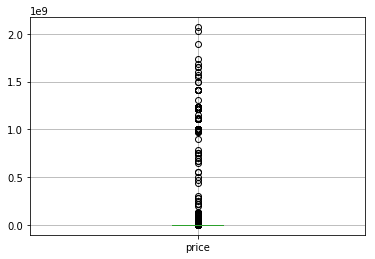

In [36]:
numerical.boxplot(column='price')

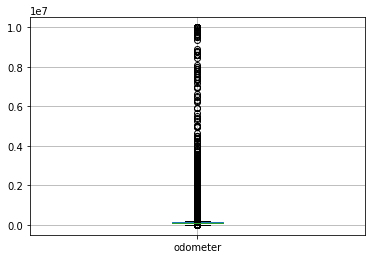

In [30]:
numerical.boxplot(column='odometer')

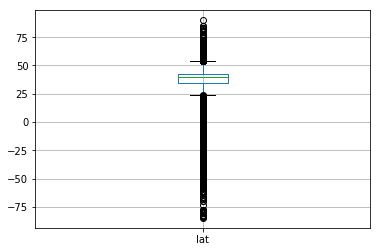

In [31]:
numerical.boxplot(column='lat')

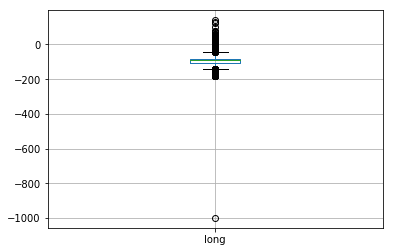

In [32]:
numerical.boxplot(column='long')

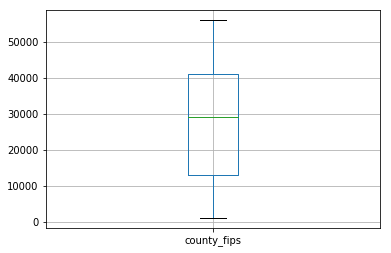

In [33]:
numerical.boxplot(column='county_fips')

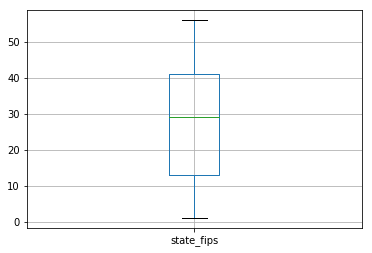

In [34]:
numerical.boxplot(column='state_fips')

## 3.3 Handle outlier 

In [ ]:
# Handle outlier using normalization min-max
# In this part, i just handle normalization for price and odometer variables, and ignore variable lat and lot 
# because in that variable is about informatuion location of Latitude of vehicle and Lotitude of vehicle and i think isn't important

In [108]:
numerik2 = ['price', 'odometer', 'lat', 'long', 'county_fips', 'state_fips']
categorical2=data.drop(numerik2,axis=1)
numerical2=data[numerik2]
numerical2.head()

,price,odometer,lat,long,county_fips,state_fips
0,11900,43600.0,43.4775,-96.7041,46083.0,46.0
1,1515,107000.0,44.7612,-96.6907,46039.0,46.0
2,17550,107000.0,44.1415,-103.2052,46093.0,46.0
3,2800,168591.0,43.2845,-95.5930,19143.0,19.0
4,400,217000.0,43.0261,-94.4064,19109.0,19.0


In [109]:
#normalization min max

numerical2['price']=(numerical2['price'] - numerical2['price'].min()) / (numerical2['price'].max() - numerical2['price'].min())
numerical2['odometer']=(numerical2['odometer'] - numerical2['odometer'].min()) / (numerical2['odometer'].max() - numerical2['odometer'].min())
numerical2.head()


C:\Users\faizah064287\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\faizah064287\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,price,odometer,lat,long,county_fips,state_fips
0,5.752125e-06,0.004360,43.4775,-96.7041,46083.0,46.0
1,7.318865e-07,0.010700,44.7612,-96.6907,46039.0,46.0
2,8.483406e-06,0.010700,44.1415,-103.2052,46093.0,46.0
3,1.353072e-06,0.016859,43.2845,-95.5930,19143.0,19.0
4,1.928816e-07,0.021700,43.0261,-94.4064,19109.0,19.0


### Checking outlier after handle outlier using min-max normalization

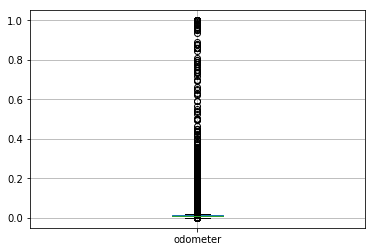

In [42]:
#checking outlier after handle outlier in odometer variable
#From boxplot knew that outlier is still exist in data. But i still use this data to analysis more cause maybe some vehicles-
# -have many edometers because they have been used for long and have an expensive price because of the quality

numerical2.boxplot(column='odometer') 

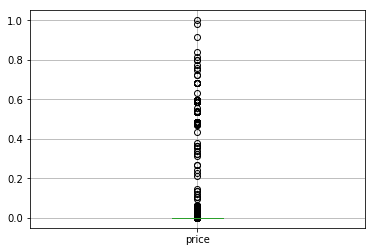

In [43]:
#checking outlier after handle outlier in price variable

numerical2.boxplot(column='price')

### Bivariate Analysis

In [90]:
#Create correlation data to looking for the correlation between numerical variabels

numerical2.corr(method = 'pearson').style.background_gradient().set_precision(2)

,price,odometer,county_fips,state_fips
price,1,-0.00041,0.00085,0.00084
odometer,-0.00041,1,0.0012,0.0012
county_fips,0.00085,0.0012,1,1
state_fips,0.00084,0.0012,1,1


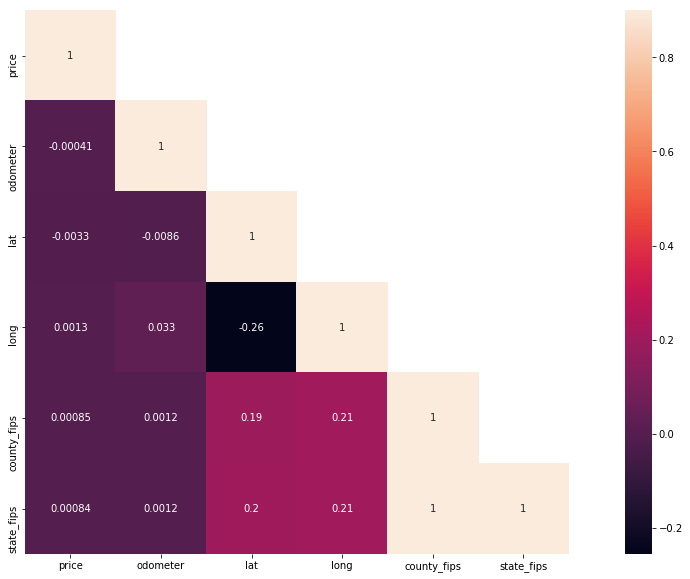

In [91]:
#create correlation with hitmap

import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

#create correlation
corr = numerical.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,10)
sns.heatmap(corr, 
            mask = mask, 
            vmax = 0.9, 
            square = True, 
            annot = True)

### Visualization using bar plot
### Univariate Analysis

### 1. Bar plot of Cylinders

Text(0.5,0,'Make')

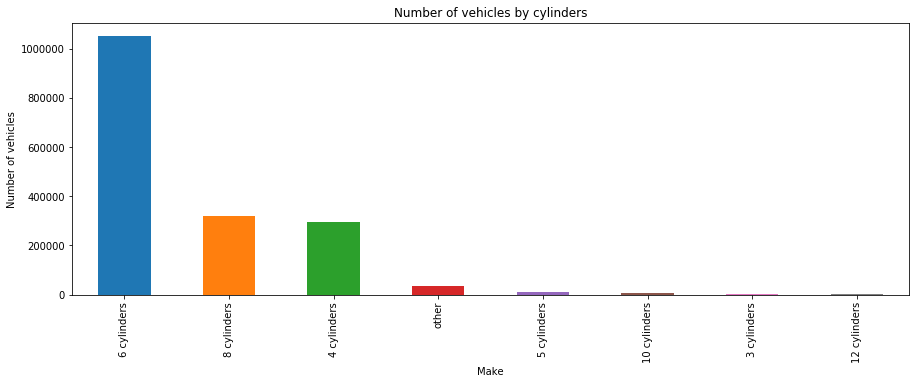

In [66]:
# In this part, we explain number of vehicle by cylinders

data['cylinders'].value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by cylinders")
plt.ylabel('Number of vehicles')
plt.xlabel('Make')

## We would know, what is type of number cylinders that most used in vehicle

Text(0.5,0,'Type of title status')

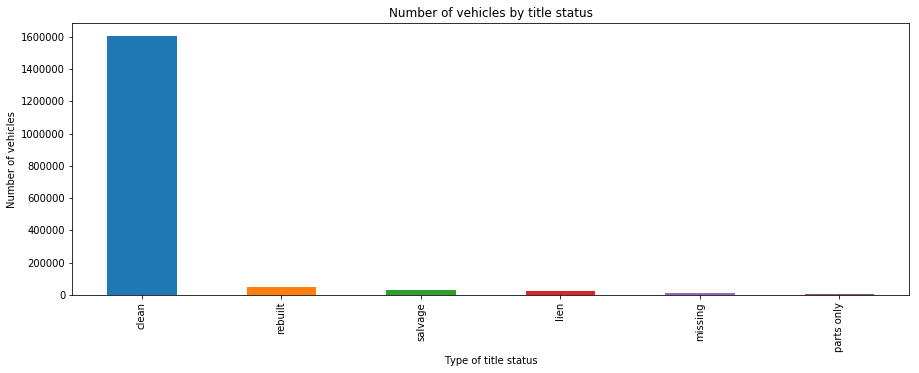

In [63]:
# In this part, I explain number of vehicle by Title Status (Title status of vehicle) 

data['title_status'].value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by title status")
plt.ylabel('Number of vehicles')
plt.xlabel('Type of title status')

Text(0.5,0,'Type of condition')

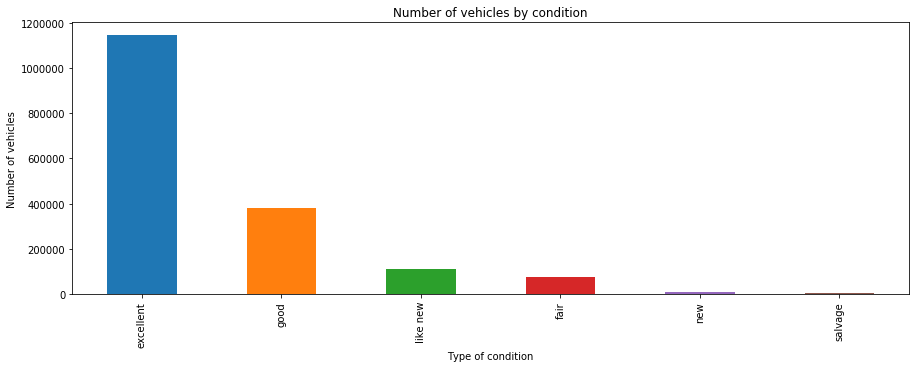

In [62]:
## In this part, I explain number of vehicle by condition

data['condition'].value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by condition")
plt.ylabel('Number of vehicles')
plt.xlabel('Type of condition')

Text(0.5,0,'Type of fuel')

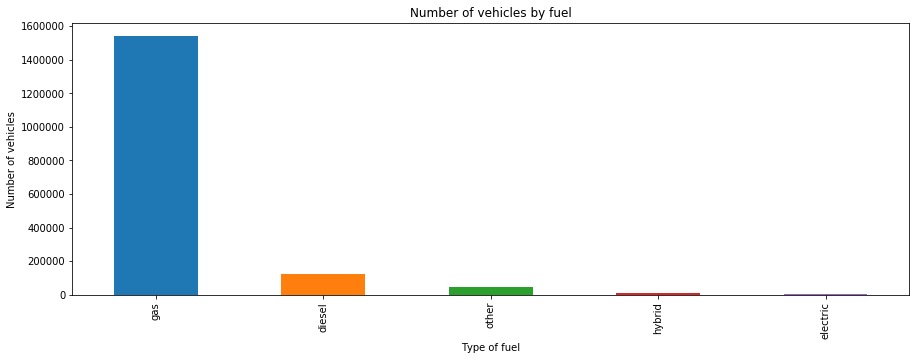

In [65]:
## In this part, I explain number of vehicle by fuel type

data['fuel'].value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by fuel")
plt.ylabel('Number of vehicles')
plt.xlabel('Type of fuel')

Text(0.5,0,'Type of manufacturer')

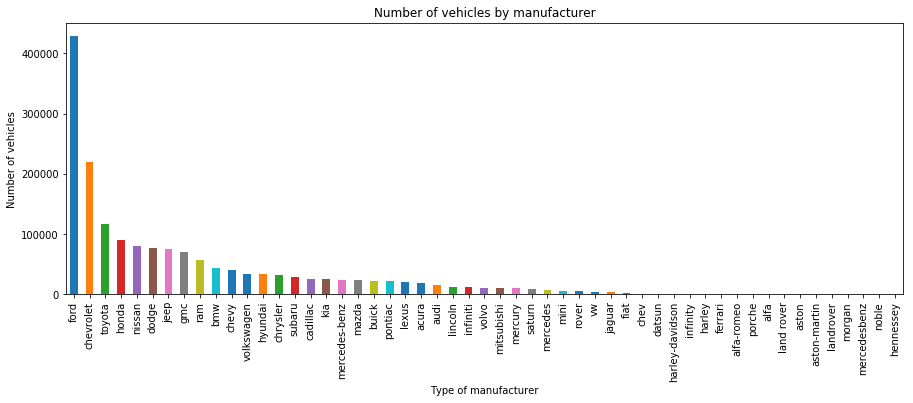

In [70]:
## In this part, I explain number of vehicle by manufacturer

data['manufacturer'].value_counts().nlargest(100).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by manufacturer")
plt.ylabel('Number of vehicles')
plt.xlabel('Type of manufacturer')

Text(0.5,0,'Type of make')

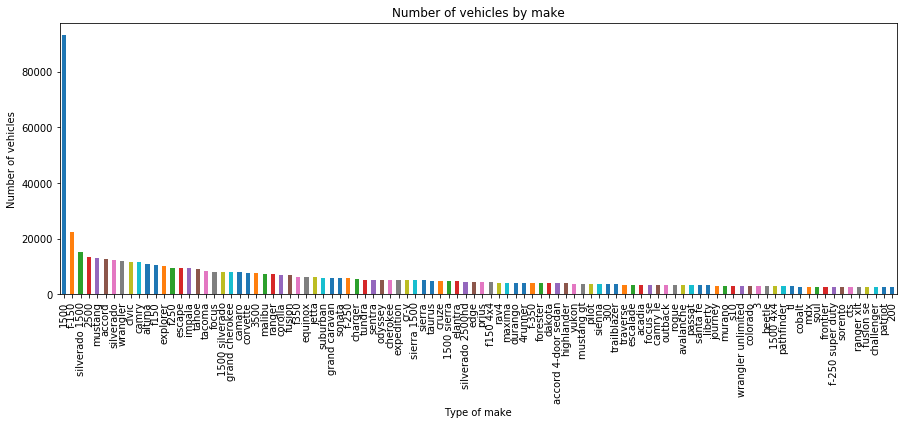

In [73]:
## In this part, I explain number of vehicle by make type

data['make'].value_counts().nlargest(100).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Type of make')

Text(0.5,0,'Type')

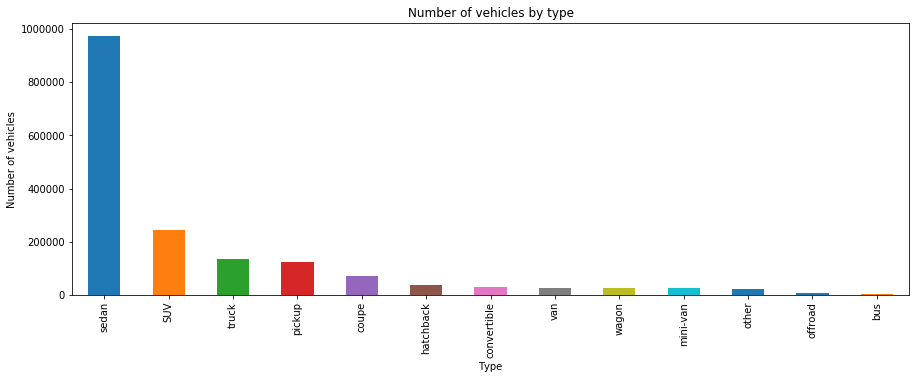

In [76]:
## In this part, I explain number of vehicle by type

data['type'].value_counts().nlargest(100).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by type")
plt.ylabel('Number of vehicles')
plt.xlabel('Type')

Text(0.5,0,'Type of paint color')

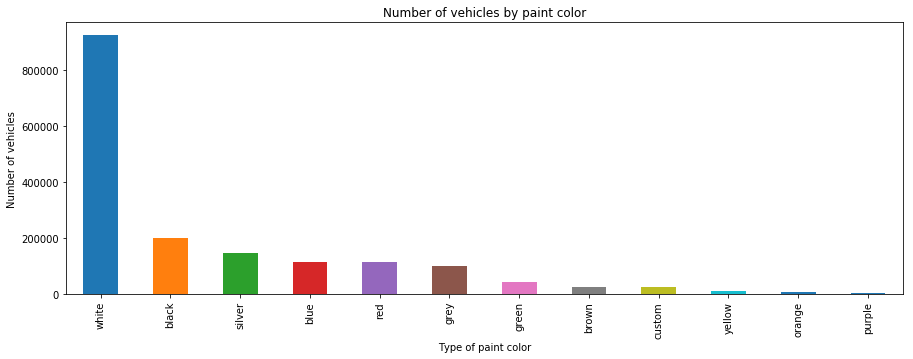

In [78]:
## In this part, I explain number of vehicle by paint color

data['paint_color'].value_counts().nlargest(100).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by paint color")
plt.ylabel('Number of vehicles')
plt.xlabel('Type of paint color')

Text(0.5,0,'Type of tarnsmission')

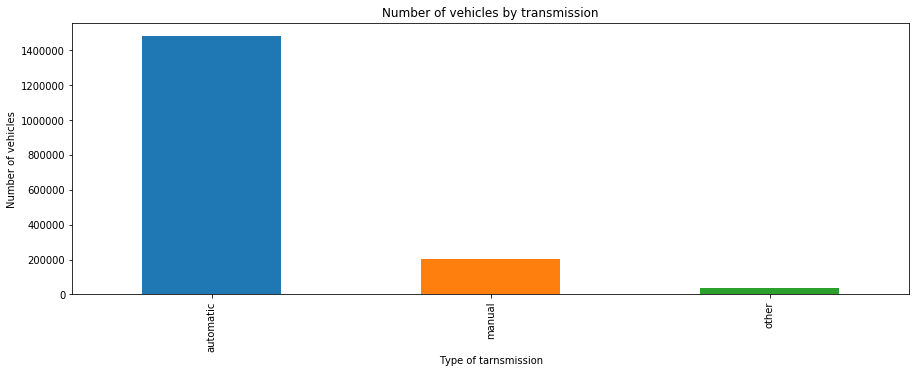

In [85]:
## In this part, I explain number of vehicle by transmission

data['transmission'].value_counts().nlargest(100).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by transmission")
plt.ylabel('Number of vehicles')
plt.xlabel('Type of tarnsmission')

Text(0.5,0,'Type of State Code')

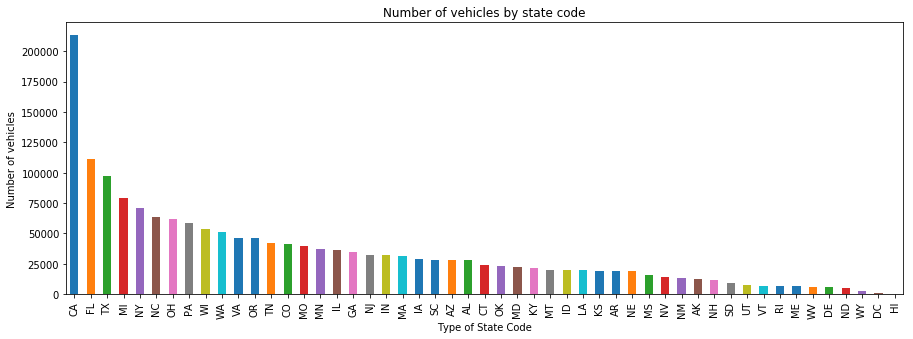

In [82]:
## In this part, I explain number of vehicle by state code

data['state_code'].value_counts().nlargest(100).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by state code")
plt.ylabel('Number of vehicles')
plt.xlabel('Type of State Code')

Text(0.5,0,'Type of State Code')

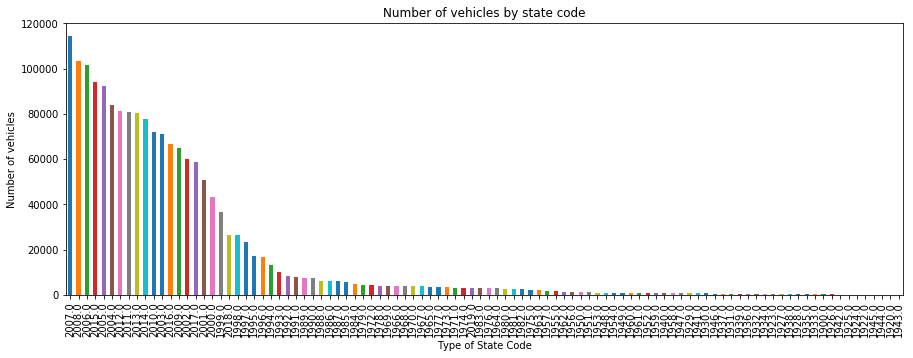

In [97]:
## In this part, I would know what is the most year that contain in data
## After that, i can explanatory of this year

data['year'].value_counts().nlargest(100).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by state code")
plt.ylabel('Number of vehicles')
plt.xlabel('Type of State Code')

# 2007

Text(0.5,0,'Type')

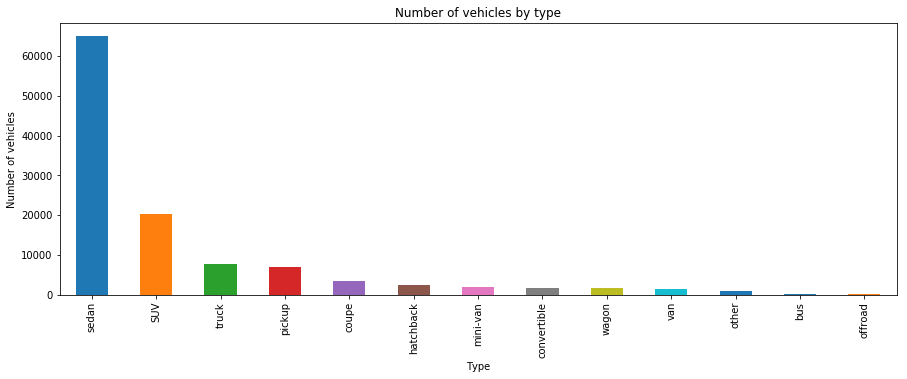

In [102]:
## Years=2007
## I get explanantory of type in 2007

data2007=data[data['year']==2007]
data2007['type'].value_counts().nlargest(100).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by type")
plt.ylabel('Number of vehicles')
plt.xlabel('Type')

Text(0.5,1,'Distribution of Title Status Type')

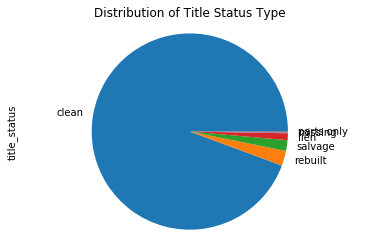

In [107]:
#Get distribution of data 2007 by title_status

data2007['title_status'].value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Distribution of Title Status Type')

Text(0.5,1,'Distribution of Fuel type')

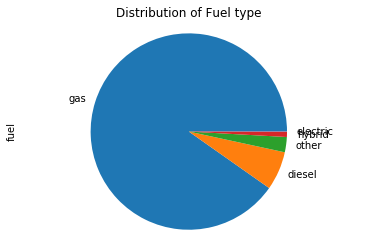

In [106]:
#Get distribution of data 2007 by title_status

data2007['fuel'].value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Distribution of Fuel type')

### Create a time series plot of data price by year

In [118]:
dataprice_sort=data.sort_values(by=['year'])
dataprice=pd.Series(dataprice_sort['price'], index=dataprice_sort['year'])
dataprice

year
302.0     10001
718.0     18413
1553.0     3300
1740.0    14000
1796.0     5500
1813.0     3800
1900.0     4000
1900.0     4000
1900.0     4000
1900.0     4000
1900.0     4000
1900.0     4000
1900.0     4000
1900.0     4000
1900.0     4000
1900.0     4000
1900.0     4000
1900.0     4000
1900.0     4000
1900.0     4000
1900.0     4000
1900.0     4000
1900.0     4000
1900.0     4000
1900.0     4000
1900.0     4000
1900.0     4000
1900.0     4000
1900.0     4000
1900.0     4000
          ...  
2019.0    35242
2019.0    35242
2019.0    35242
2019.0    35242
2019.0    35242
2019.0    35242
2019.0    35242
2019.0    35242
2019.0    35242
2019.0    35242
2019.0    35242
2019.0    35242
2019.0    35242
2019.0    35242
2019.0    35242
2019.0    35242
2019.0    35242
2019.0    35242
2019.0    35242
2019.0    35242
2019.0    35242
2019.0    35242
2019.0    35242
2019.0    35242
2019.0    35242
2019.0    35242
2019.0    35242
2019.0    35242
2019.0    35242
2019.0    35242
Name: price, Length

In [124]:
# Drop year below cause is so significance if i get time series plot include that year

dataprice=dataprice.drop([302,718,1553, 1740, 1796, 1813])

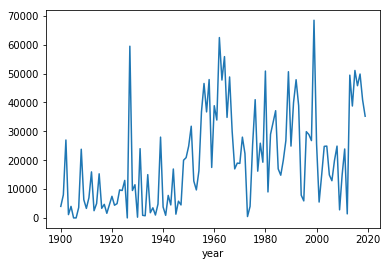

In [125]:
## Time series plot of price by year

dataprice.plot()
plt.show()

### Get Information of Data

In [131]:
## get name of city that have the highest vehicles

city = data['city'].value_counts()
city.head(1)

cosprings    8283
Name: city, dtype: int64